# Describing the Data 
A summary by Marcus Mähring: mmaehring@student.ethz.ch

This chapter aims to provide some fundamentals used when describing acquired data. Most of the inspiration is from Barlow "<i> Statistics, A Guide to the Use of Statistical Methods in the Physical Sciences </i>" but I have added some things I think are important or to elucidate certain points. 

In [1]:
using StatsPlots, Statistics, Distributions, StatsBase, Random
using Unitful, LsqFit

A short note on grammar: 

<blockquote> Data is a plural noun, meaning we use "The data <i>fit</i>..." instead of "The data <i>fits</i>...". </blockquote>

Representing data is very important. One graphs says way more than its constituents!

## Bar charts and histograms 
There is a technical distinction between a bar graph and a histogram. 

<b> Histogram </b>: The number represented is proportional to the <i> area </i>

<b> Bar </b>: The number represented is proportional to the <i> length </i>

#### A bar graph example: 
<b> Example: </b> tossing a coing twenty times. Here "H" means we got <i> heads </i> and "T" means we got <i> tails </i>. 

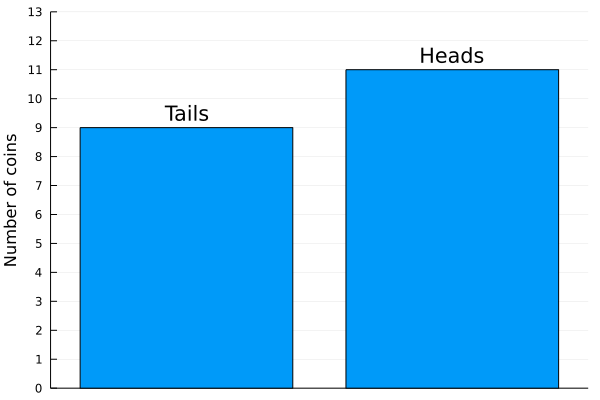

In [2]:
H = 0
T = 1
coin_tosses = [H, T, H, H, T, H, T, H, H, H, T, T, H, T, T, H, T, H, H, T];

plot([sum(coin_tosses), length(coin_tosses)-sum(coin_tosses)], 
      seriestype=:bar, xticks=:none, yticks=0:15, label=:none, ylabel="Number of coins", ylims = (0,13))
annotate!(1, 9.5, "Tails")
annotate!(2, 11.5, "Heads")

From what can we extract the maximal amount of understanding of the data in the shortest amount of time? 

People are always debating how graphs should look and my only advance is take it in stride. Some people are gonna want you to have space between the bars in a bar graph, and some people will despise how this looks. It varies wildly! 

Note that you have to choose a good amount of events in each bin! Aim for about ~7 or ~10 events per bin. Depending on the number of measurements performed, this might vary. 

##### A histogram example (exercise 2.6 in Barlow) 
Here are 80 numbers:

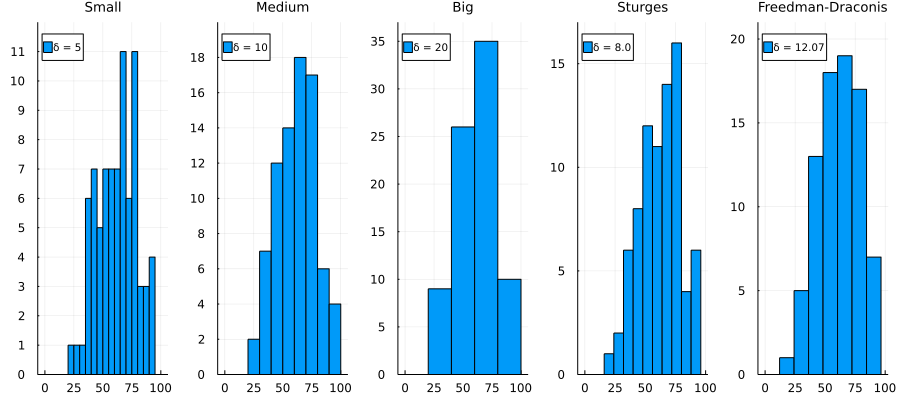

In [3]:
l = [
    90, 90, 79, 84, 78, 91, 88, 90, 85, 80,
    88, 75, 73, 79, 78, 79, 67, 83, 68, 60,
    73, 79, 69, 74, 76, 68, 72, 72, 75, 60,
    61, 66, 66, 54, 71, 67, 75, 49, 51, 57,
    62, 64, 68, 58, 56, 79, 63, 68, 64, 51,
    58, 53, 65, 57, 59, 65, 48, 54, 55, 40,
    49, 42, 36, 46, 40, 37, 53, 48, 44, 43, 
    35, 39, 30, 41, 41, 22, 28, 36, 39, 51
];

h1 = histogram(l, bins=(0:5:100), label="δ = 5", legend=:topleft, legendfontsize=7, yticks=0:1:11, ylims=(0, 12), title="Small", titlefontsize=9);
h2 = histogram(l, bins=(0:10:100), label="δ = 10", legend=:topleft, legendfontsize=7, yticks=0:2:19, ylims=(0, 20), title="Medium", titlefontsize=9);
h3 = histogram(l, bins=(0:20:100), label="δ = 20", legend=:topleft, legendfontsize=7, yticks=0:5:40, ylims=(0, 37), title="Big", titlefontsize=9);

# The next two are common rules of thumb when the binning size is not obvious. 
sturges = ceil( log2( length(l) ) ) + 1
h4 = histogram(l, bins=(0:sturges:100), label="δ = $(sturges)", legend=:topleft, legendfontsize=7, yticks=0:5:15, ylims=(0, 17), title="Sturges", titlefontsize=9);
freedman_diaconis = 2*( iqr(l) / cbrt( length(l) ) ) #cbrt is the cube root ()^1/3
h5 = histogram(l, bins=(0:freedman_diaconis:100), label="δ = $(round(freedman_diaconis; digits=2))", legend=:topleft, legendfontsize=7, yticks=0:5:27, ylims=(0, 21), title="Freedman-Draconis", titlefontsize=9);

plot_layout = @layout[a b c d e];
plot(h1, h2, h3, h4, h5, layout = plot_layout, size=(900, 400))

The $\delta$ in the legend represents the stepsize of our bins. The data ranges between 20 and 100, so we choose the bins as the interval [20, 100] partitioned with the above stepsize. 

The far left one does not capture the <i> general </i> structure of our data set, even though it does captures the detailed description better.   


For the center one and the right one the situation is more interesting. Are there at least 7 events in each bin in the center diagramme? No. But we need to look on the overall picture. While the one with $\delta = 20$ fulfills our rule of thumb, in this case it is equally valid (or even better) to use a step-size $\delta = 10$.  

## Methods of describing data numerically
Sometimes pictures don't capture the quintessence of your measurements, and you need a number which succinctly summarizes it for you. At this point we turn to descriptors, the most common of which are the (arithmetic) <i> mean </i>, <i> variance </i>, and <i> standard deviation </i>

### Measures of centering
###### The arithmetic mean 
For a data set $\{x\}_{i=1}^N$ the <b> arithmetic mean </b> is defined as 
$$
        \bar{x} = \mu = \frac{1}{N} \sum_i x_i
$$
where we often denote the mean of a data set either with the "bar" over the variable in question or simply by $\mu$. <br>
Likewise, the mean value of an arbitrary function can be calculated by using
$$
        \bar{f} = \frac{1}{N} \sum_i f(x_i).
$$ <br>
<b>Example:</b> Say we have weighed five metal foils and gotten the masses shown below

In [6]:
masses = [25, 24, 27, 29, 25]u"g"; # the last syntactic part comes from the Julia package Unitful.jl which handles units. 

Now, calculating the mean in your head or on paper would just involve summing the masses and then dividing by 5 giving 26 grams. <br> This can be verified numerically: 

In [7]:
mean(masses)

26.0 g

###### Extra: Mean of binned data and alternatives to the arithmetic mean
For a <b> binned </b> data set, we assume that for every bin (entry) $j$ we have recorded $n_j$ data points, then the mean can be modified as such
$$
    \bar{x} = \frac{1}{N}\sum_j n_j x_j \qquad \qquad \qquad \bar{f} = \sum_j n_j f(x_j)
$$

Sometimes other ways of defining the mean or even a different descriptor provides a clearer picture of the recorded data. 
This is however very rare in my personal experience. I don't think I've used another mean except in toy examples. 

The <b> geometric </b> mean: 
$$
    \sqrt[N]{x_1 x_2 x_3 \dots x_N},
$$
which for two numbers can be visualized as the length of the side of a square of area equal to the product of the two numbers. 

The <b> harmonic </b> mean:
$$
    \frac{N}{x_1^{-1} + x_2^{-1} + x_3^{-1} + \dots + x_N^{-1}}
$$

The <b> root mean square </b>
$$
    \sqrt{\frac{x_1^2 + x_2^2 + x_3^2 + \dots + x_N^2}{N}}
$$

Two measures for data which are not particularly common in physics are the <b>mode</b> and the <b>median</b>. 

The mode is the <i> most common entry </i> while the median is the <i> halfway point </i> of the data. 

### Measures of spread 
##### The variance and the standard deviation 
The mean describes your data set with a single number, but can easily be misleading. Consider the following two data sets, are they the same?

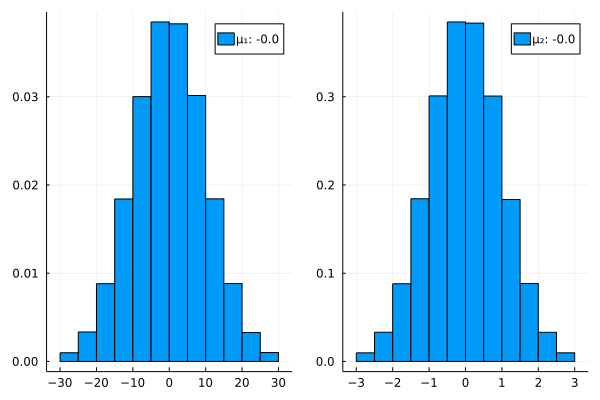

In [8]:
Random.seed!(8)
Gauss1 = Normal(0, 10)
sample1 = [rand(Gauss1) for i in 1:1e6]
Gauss2 = Normal(0, 1)
sample2 = [rand(Gauss2) for i in 1:1e6]

p1 = histogram(sample1, bins=-30:5:30, label="μ₁: $(round(mean(sample1), digits=2))", normalized=true)

p2 = histogram(sample2, bins=-3:0.5:3, label="μ₂: $(round(mean(sample2), digits=2))", normalized=true)

plot(p1, p2, size=(600,400))

They are obviously not the same, as the left data set is spread from -30 to 30 while the right data set is between -3 and 3. 

##### The variance
Obviously these two sets of data are not the same, even so, their means are both zero. This leads us to consider the spread of the two distributions (data sets). We define the <b> variance </b> of a data set:
$$
    V(x) = \frac{1}{N}\sum_i (x_i - \bar{x})^2
$$
Which as before analogously extends to functions. As this is not the focus of most analyses, they will be left out for now, but do consult Barlow (in this case chapter 2.4) if the need arises. 

There are quite a few neat tricks one can use to simplify formulas in statistics, which mostly boils down to expanding the summation and identifying previously defined moments or quantities. 
$$
    V = \frac{1}{N}\sum_i (x_i - \bar{x})^2 = \frac{1}{N}\sum_i x_i^2 - \frac{1}{N} \sum_i 2x_i\bar{x} + \frac{1}{N}\sum_i \bar{x}^2 = \bar{x^2} - 2\bar{x}^2 + \bar{x}^2 = \bar{x^2} - \bar{x}^2
$$
Meaning we have
$$
    V(x) = \bar{x^2} - \bar{x}^2
$$
which is an important result that also often shows up when computing weighted averages, analogously as you will see in quantum mechanics.

##### The standard deviation
The <b> standard deviation </b> is defined as the root square of the variance, meaning:
$$
     \sigma = \sqrt{V(x)} \qquad \qquad \qquad \sigma = \sqrt{\bar{x^2} - \bar{x}^2}
$$
or in its explicit form:
$$
    \sigma = \sqrt{\frac{1}{N} \sum_i (x_i - \bar{x})^2}
$$

A note on usage: we usually <i> prefer working with the standard deviation </i> -- even though the variance is in principle easier to calculate -- for a simple reason: it has the same units as the random variable (data). 

This now solves our problem from before, adding the standard deviation as a measure of the data's spread makes the two previous data sets distinguishable!

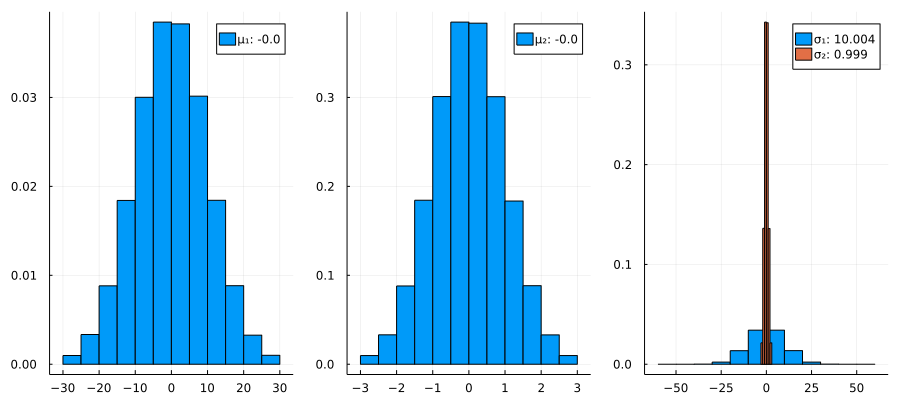

In [9]:
p3 = histogram(sample1, bins=-60:10:60, normalized=true, label="σ₁: $(round(std(sample1), digits=3))")
histogram!(sample2, bins=-3:1:3, normalized=true, label="σ₂: $(round(std(sample2), digits=3))")

layout = @layout [a b c]
plot(p1, p2, p3, layout=layout, size=(900, 400))

<b> Example: </b> Laboratory marks.  

Say you are to correct reports from a lab class and are left with the following grades:

<table>
    <tr>
        <th> Number of students </th>
        <th> Grades </th>
    </tr>
    <tr>
        <th> 10 </th>
        <th> 6 </th>
    </tr>
    <tr>
        <th> 60 </th>
        <th> 7 </th>
    </tr>
    <tr>
        <th> 10 </th>
        <th> 8 </th>
    </tr>
</table>
Then we are left with with a mean, variance and standard deviation of 
$$
    \mu = \frac{10 \cdot 6 + 60 \cdot 7 + 10 \cdot 8}{80} = 7.0 \\
    V  = \frac{10 \cdot(6 - 7)^2 + 60 \cdot(7 - 7)^2 + 10 \cdot( 8 - 7)^2}{80} = 0.25 \\
    \sigma = \sqrt{0.25} = 0.5
$$

#### Different Definitions of the Standard Deviation, adjacent concepts, and overall confusion reigns!
There is an unfortunate tendency in statistics to use simiar, but <i> not </i> identical concepts interchangebly, changing only small aspects. One of my favorite passages from Barlow (p. 10, ch 2.4) states:

> The definition of $\sigma$ is a minefield of alternatives, and to call it the 'standard' deviation is something of a sick joke. 

For your convenience, I only mention the alternatives I have encountered myself and leave the nuances up to you if you are interested. Feel free to ask me aswell! At this point I would also just like to give a disclaimer, that the distinctions made in the following chapter can be quite nuanced and also involve concepts regarding distributions and estimators. In other words, it may be worth to read this after we've gotten further into the course/book.

Above, we defined the standard deviation of a data sample as
$$
    \sigma = \sqrt{\frac{1}{N} \sum_i (x_i - \bar{x})^2}.
$$
So far so good. However, our data is taken as a sample from a <i> parent distribution </i>, in general with a mean $\mu_\text{distr}$ and standard deviation $\sigma_\text{distr}$ of their own. In terms of expectation values:
$$
    \mu_\text{distr} = \langle x \rangle  \qquad  \qquad \sigma_\text{distr} = \sqrt{\langle x^2 \rangle - \langle x \rangle ^2}
$$
Note how there is then a clear distinction between $\bar{x}$, the mean of the sample, and $\mu$, that of the parent, while complete confusion arises for the $\sigma$!

In other words: we can define $\sigma$ as Frankenstein's monster of different compontents. We can use the expectation values, the underlying distribution's parameters, or a combination thereof. This is awfully confusing, but one important case is that of the <i>unbiased estimate of $\sigma_\text{distr}$</i>. 
$$
    s = \sqrt{\frac{1}{N-1}\sum_i (x_i - \bar{x})^2}
$$
What has changed here? Essentially, we are now essentially assuming one less <i>degree of freedom</i> for the data. Note how this expression is ill-defined for a data set containing one point.  

Some people argue the definitions associated with the parent distribution are more 'natural', best measured by the above estimator (they actually mostly like substituting $\bar{x}$ for $\mu$ in the original formula, but resort to the above estimator if $\mu$ is unknown).

One should also note that the moments used to define $\sigma_\text{distr}$ are not well-defined for all distributions, such as the <i>Cauchy distribution</i>, yet physicists calculate the 'spread' in form of the standard deviation of this distribution all the time. 

<i> What you need to understand </i>: the standard deviation of the data is not per se equal to the best estimate of the underlying distribution's, and one should thus be careful to distinguish these in one's mind. Even though the estimator $s$ of the distribution's $\sigma_\text{distr}$ are often treated as the same thing as the $\sigma$ by simply removing one from the number of points!

Certain programming languages, Julia among them, implements the standard deviation as above, but with an optional parameter usually called something even more misleading, such as "corrected" (in Julia set to true as default). Consult the documentation of your package/software before starting your analyses so you are aware what you are doing. 

#### Alternative Measures of Spread
The <i>range</i> of the data is the difference between the highest and the lowest value. This is very sensitive to fluctuations in the data, as the outliers determine the spread. 

The <i>interquartile range</i> is useful in the same circumstances one uses the median. The <i>lower quartile</i> signifies the point with 25\% of the data below it and 75\% above. Analogously, the <i>upper quartile</i> is the point with 25\% above an 75\% below. The <i>IQR is then defined as the upper quartile minus the lower quartile</i> (we used this above when defining the Freedman-Draconis criteria for bin size when creating histograms). 

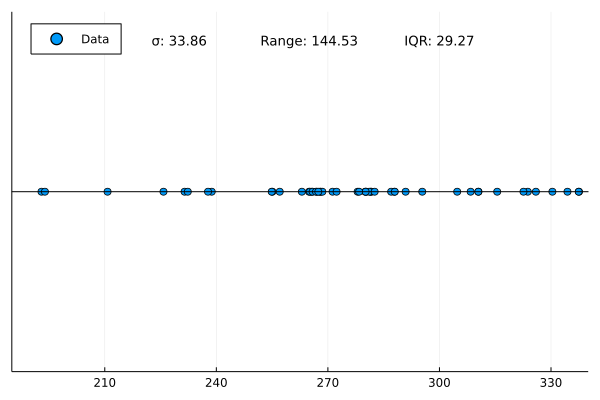

In [10]:
Random.seed!(12)
sample_data = [(rand(Normal(274, 28)), 0) for i in 1:50];

scatter(sample_data, yticks=:none, ylims=(-0.05, 0.05), label="Data", legend=:topleft, xlims=(185, 340))
plot!(x->0, 125:0.5:360, label=:none, color=:black)
annotate!(230, 0.042, text("σ: $(round.(std(first.(sample_data), corrected=false), digits=2))", 9))
annotate!(265, 0.042, text("Range: $(round.(maximum(first.(sample_data)) - minimum(first.(sample_data)), digits=2))", 9))
annotate!(300, 0.042, text("IQR: $(round(iqr(first.(sample_data)), digits=2))", 9))

Finally, we want to take a look at the <i>full width at half maximum</i>, also known as full-width, half maximum, or <b>FWHM</b> for short. This measure of the spread is <i>independant of the tails</i>, as it only uses the central parts of the distribution. The FWHM can easily be computed by drawing a vertical line at the peak and then a horizontal line at half the height. The distance between the two first intersections of this horizontal line is the FWHM. 

For the Gaussian distribution, it takes a particularly simple form (see chapter 3 for a more thorough explanation). At maximum a Gaussian has the amplitude: 
$$
    \frac{A}{\sigma \sqrt{2\pi}}
$$
The half maximum points are then given by (we shift the mean of the Gaussian to zero for simplicity and cancel the normalization factors):
$$
    \exp\left(\frac{-x_0^2}{2\sigma^2}\right) \overset{!}{=} \frac{1}{2} \qquad \implies \qquad x_0 = \pm\sigma\sqrt{2\log2}
$$
$$
    \text{FWHM} = 2\sigma\sqrt{2\log2} \approx 2.35\sigma
$$


### Higher Powers of $x$ ('moments')
The mean and standard deviation are the first and second <i>powers</i> of the data values. We can obtain higher-order powers:
##### Skew
Skew is used to describe the asymmetry and is derived from the third power of the data. 
$$
    \gamma = \frac{1}{N\sigma^3}\sum_i (x_i - \bar{x})^3 = \frac{1}{\sigma^3} \overline{(x-\bar{x})^3} = \frac{1}{\sigma^3}\left( \overline{x^3} - 3\bar{x}\overline{x^2} + 2\bar{x}^3 \right)
$$
With the last step derived analogously to the expansion of the variance above. The above quantity is <i>unitless</i>. 

Symmetrically distributed data has a $\gamma = 0$. 

Data with a tail extending to the <i>right</i>: $\gamma > 0$, <i>positive skew</i>. 

Data with a tail extending to the <i>left</i>: $\gamma < 0$, <i>negative skew</i>. 

Unusual to see this in physics, as we are mainly interested in the error. The Maxwell distribution of velocities in a gas is a skew distribution. Sometimes with the term 'skew', one refers to <i> Pearson's skew</i>, defined as
$$
    \text{Skew} = \frac{\text{mean}-\text{mode}}{\sigma}
$$
but generally, this is then stated explicitly. 

##### Even higher powers, curtosis
The fourth power is the curtosis (also spelled kurtosis) which is also unitless. 
$$
    c = \frac{1}{\sigma^4}\overline{(x-\bar{x})^4} - 3
$$
but no one uses this, enjoy having seen it. The general <i>$r$th moment</i>:
$$
    \frac{1}{N}\sum_i x^r_i
$$
and the <i>$r$th central moment</i>:
$$
    \frac{1}{N}\sum_i(x_i - \bar{x})^r
$$
With skew and curtosis (apart from unimportant constants) equal to the third and fourth central moments. 

## Several variables
Sometimes the data we encounter consists of more than a one value. We want to investigate the relationships between the different quantities. 
#### Covariance
Suppose we have a <i>pair</i> of numbers $\{(x_i, y_i)\}_{i=1}^N$ we can find their individual moments. We define the <b>covariance</b> of the variables:
$$
    \text{cov}(x,y) = \frac{1}{N}\sum_i (x_i - \bar{x})(y_i - \bar{y}) = \overline{xy}-\bar{x}\bar{y}
$$
If values of x and y tend to appear above/below average at the same time, the above expression will have a large norm with a positive/negative sign. We then call the variables <i>positively</i>/<i>negatively</i> correlated. 

Some remarks:
- We only care about displacements from the mean, meaning that the covariance is independent of a shift in origin. 
- The covariance is a generalization of the variance, $\text{cov}(x,x)=V(x)$ 

#### Correlation
The covariance is useful but has dimensions. A covariance between height and weight of 7.6 means that one quantity is in centimetre-grams and the other in meter-kilograms. A unitless measure is the <b>correlation coefficient</b>, $\rho$:
$$
    \rho = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} = \frac{\overline{xy}-\bar{x}\bar{y}}{\sigma_x \sigma_y} \in [-1, 1]
$$
If $\rho = 0$, we call the two quantities <i>uncorrelated</i>. 

Important remark, <i>correlation does <b>not</b> equal causation</i>!
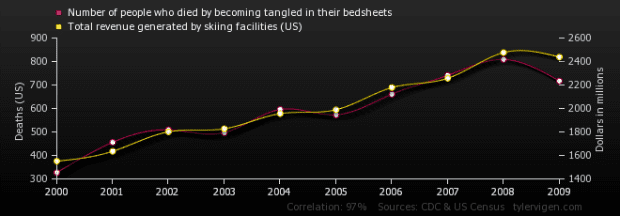

#### More than two variables: the covariance matrix
For an arbitrary tupel of variables we can calculate the covariance between each pair of variables
$$
    \text{cov}(x_{(i)}, x_{(j)}) = \overline{x_{(i)}x_{(j)}}-\bar{x}_{(i)}\bar{x}_{(j)}
$$
were the parentheses signify which elements in the tupel we correlate with which other element. This is usually written in a $n\times n$ symmetric matrix:
$$
    V_{ij} = \text{cov}(x_{(i)}, x_{(j)})
$$
which is called the <b>covariance matrix</b>, <b>variance matrix</b>, or <b>error matrix</b>. The diagonal elements are the variances. 

The <b>correlation matrix</b> is the dimensionless equivalent with all elements between -1 and 1. 
$$
    \rho_{ij} = \frac{\text{cov}(x_{(i)}, x_{(j)})}{\sigma_i\sigma_j}
$$
The diagonal elements are all equal to 1. 

One convenient way of writing the covariance matrix is then:
$$
    V_{ij} = \rho_{ij}\sigma_i\sigma_j
$$

## Problems 

##### 2.1 
The ages in years in a class of 25 students are as follows:

In [11]:
ages = [19.0, 18.7, 19.3, 19.2, 18.9, 19.0, 20.2, 19.9, 18.6, 19.4, 19.3, 18.8, 19.3, 19.2, 18.7, 18.5, 18.6, 19.7, 19.9, 20.0, 19.5, 19.4, 19.6, 20.0, 18.9];

<b> Solution: </b>

In [12]:
mean_val = sum(ages)/length(ages) #, mean(ages)

19.264

In [13]:
standard_deviation = sqrt(sum((ages.-mean_val).^2)/(length(ages) - 1)) #, std(ages)

0.49571497186723446

In [14]:
#Bonus: skew, #skewness(ages, corrected=false)
γ = 1/(std(ages)^3) * mean( ( ages .- mean(ages) ).^3 )

0.21249079217397843

##### 2.2 

Redo the previous calculation while including the age of the lecturer, 37. Which indicator changes more and why?

<b> Solution: </b>

In [15]:
ages_lec = [19.0, 18.7, 19.3, 19.2, 18.9, 19.0, 20.2, 19.9, 18.6, 19.4, 19.3, 18.8, 19.3, 19.2, 18.7, 18.5, 18.6, 19.7, 19.9, 20.0, 19.5, 19.4, 19.6, 20.0, 18.9, 37.0];

In [16]:
mean_val = sum(ages_lec)/length(ages_lec)

19.94615384615384

In [17]:
standard_deviation = sqrt(sum((ages_lec.-mean_val).^2)/(length(ages_lec)-1)) #, std(ages)

3.512062729420506

In [18]:
#Bonus: skew, #skewness(ages_lec, corrected=false). 
γ = 1/(std(ages_lec, corrected=false)^3) * mean( ( ages_lec .- mean(ages_lec) ).^3 )

4.652201927870351

##### 2.4

The marks of 12 students in classical mechanics and quantum mechanics are as follows:

In [19]:
classical = [22, 48, 76, 10, 22, 4, 68, 44, 10, 76, 14, 56];
quantum = [63, 39, 61, 30, 51, 44, 74, 78, 55, 58, 41, 69];

Calculate the two average marks, the covariance, and the correlation. <br>
BONUS from Marcus: plot the data sets against each other and try to identify the calculated features in the graph. 

<b> Solution: </b>

In [20]:
mean.([classical, quantum]), cov(classical, quantum, corrected=false), cor(classical, quantum)

([37.5, 55.25], 207.45833333333334, 0.5651642265418637)

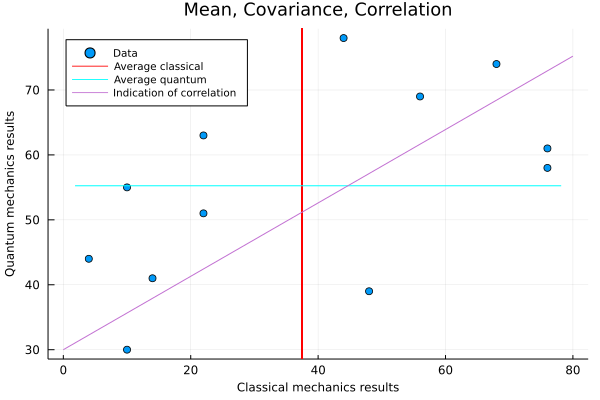

In [21]:
plot(classical, quantum, seriestype=:scatter, label="Data", 
    xlabel="Classical mechanics results", ylabel="Quantum mechanics results", labelfontsize=8)
vline!(x->mean(classical), label="Average classical", legendfontsize=7, legend=:topleft, color=:red)
plot!(x->mean(quantum), label="Average quantum", title="Mean, Covariance, Correlation", titlefontsize=12, color=:cyan)
plot!(0:80, collect(0:80)*cor(classical, quantum) .+ 30, label="Indication of correlation")

Note that you can also identify the high covariance by observing the distances from the respective data to their means are big/small at the same time. 

Below the dark green lines give the distance from the data points to the mean of the classical data while the dark blue give the distance to the average quantum. 

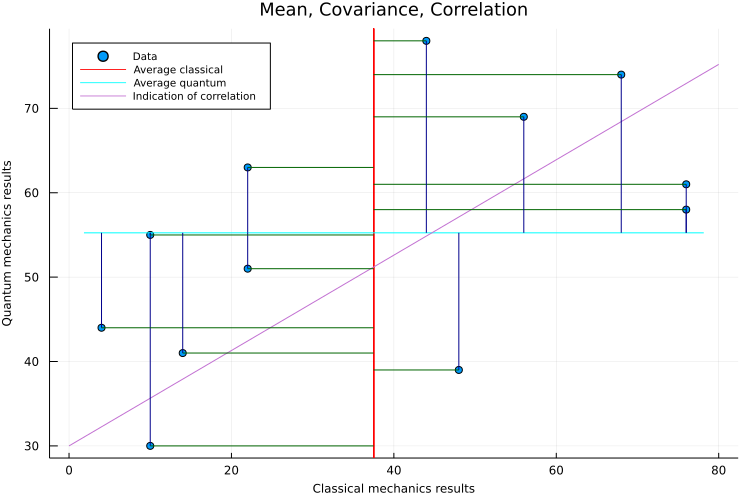

In [22]:
mean_c, mean_q  = mean.([classical, quantum])
for (i,j) in zip(classical, quantum)
   plot!([i, i], [mean_q, j], c=:darkblue, label=:none, lw=1) 
   plot!([mean_c, i], [j, j], c=:darkgreen, label=:none, lw=1) 
end
plot!(size=(750,500))